# 1. 사용환경 설정 및 데이터 불러오기

In [1]:
import pandas as pd
import os
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
os.chdir('C:/Users/user/Desktop/미래에셋/mase_bigdata/')

FileNotFoundError: ignored

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/미래에셋/미래에셋증권_공모전데이터.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,4,22,33,34,35,39,40,41,45,46,47,61,62,80,91,92,93,97,98,99,103,104,105,119,120,138,149,150,151,155,156,157,161,162,163,177,178,196,207,208,209,213,214,215,219,220,221,235,236,254,265,266,267,271,272,273,277,278,279,293,294,312,323,324,325,329,330,331,335,336,337,351,352,370,381,382,383,387,388,389,393,394,395,409,410,428,439,440,441,445,446,447,451,452,453,467,468,486,497,498,499,503,504,505,509,510,511,525,526,544,555,556,557,561,562,563,567,568,569,583,584,602,613,614,615,619,620,621,625,626,627,641,642,660,671,672,673,677,678,679,683,684,685) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.head()

In [ ]:
df.shape

(1499992, 699)

In [ ]:
df.isnull().sum()

성별                   0
연령                   0
최초계좌개설일              0
고객등급_202105          0
주거래상품_202105         0
                    ..
Dr.Big의시그널_202006    0
뉴스로종목포착_202006       0
해외ETF트렌드_202006      0
초고수의선택_202006        0
주간상품TOP10_202006     0
Length: 699, dtype: int64

In [ ]:
df = df.sample(n=300000, replace=False, random_state=1)

print(df.shape)

(300000, 699)


# 2. 항목별 데이터 전처리 및 내보내기

## 2-1. 월별 daytrading, swing, hold 비중

### 2-1-1. daytrading, swing, hold 데이터 추출

In [ ]:
day_trading1 = df[[f'DayTrading비중_20200{i}' for i in range(6,10)]]
day_trading2 = df[[f'DayTrading비중_2020{i}' for i in range(10,13)]]
day_trading3 = df[[f'DayTrading비중_20210{i}' for i in range(1,6)]]

day_trading = pd.concat([day_trading1, day_trading2, day_trading3], axis=1)
for i in day_trading:
    day_trading.loc[:,i] = pd.to_numeric(day_trading.loc[:,i])

day_trading.columns = ['daytradingRate_2006', 'daytradingRate_2007', 'daytradingRate_2008', 'daytradingRate_2009',
                'daytradingRate_2010', 'daytradingRate_2011', 'daytradingRate_2012', 'daytradingRate_2101',
                'daytradingRate_2102', 'daytradingRate_2103', 'daytradingRate_2104', 'daytradingRate_2105']
day_trading.head()

,daytradingRate_2006,daytradingRate_2007,daytradingRate_2008,daytradingRate_2009,daytradingRate_2010,daytradingRate_2011,daytradingRate_2012,daytradingRate_2101,daytradingRate_2102,daytradingRate_2103,daytradingRate_2104,daytradingRate_2105
1390825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250034,0.0,8.0,7.0,15.0,12.0,12.0,11.0,14.0,14.0,18.0,25.0,32.0
695531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1288685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
swing1 = df[[f'Swing비중_20200{i}' for i in range(6,10)]]
swing2 = df[[f'Swing비중_2020{i}' for i in range(10,13)]]
swing3 = df[[f'Swing비중_20210{i}' for i in range(1,6)]]

swing = pd.concat([swing1, swing2, swing3], axis=1)
for i in swing:
    swing.loc[:,i] = pd.to_numeric(swing.loc[:,i])

swing.columns = ['swingRate_2006', 'swingRate_2007', 'swingRate_2008', 'swingRate_2009',
                'swingRate_2010', 'swingRate_2011', 'swingRate_2012', 'swingRate_2101',
                'swingRate_2102', 'swingRate_2103', 'swingRate_2104', 'swingRate_2105']
swing.head()

,swingRate_2006,swingRate_2007,swingRate_2008,swingRate_2009,swingRate_2010,swingRate_2011,swingRate_2012,swingRate_2101,swingRate_2102,swingRate_2103,swingRate_2104,swingRate_2105
1390825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250034,0.0,91.0,92.0,84.0,87.0,83.0,84.0,79.0,79.0,74.0,69.0,63.0
695531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0,99.0
1288685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
hold1 = df[[f'Buy&Hold비중_20200{i}' for i in range(6,10)]]
hold2 = df[[f'Buy&Hold비중_2020{i}' for i in range(10,13)]]
hold3 = df[[f'Buy&Hold비중_20210{i}' for i in range(1,6)]]

hold = pd.concat([hold1, hold2, hold3], axis=1)
for i in hold:
    hold.loc[:,i] = pd.to_numeric(hold.loc[:,i])

hold.columns = ['holdRate_2006', 'holdRate_2007', 'holdRate_2008', 'holdRate_2009',
                'holdRate_2010', 'holdRate_2011', 'holdRate_2012', 'holdRate_2101',
                'holdRate_2102', 'holdRate_2103', 'holdRate_2104', 'holdRate_2105']
hold.head()

,holdRate_2006,holdRate_2007,holdRate_2008,holdRate_2009,holdRate_2010,holdRate_2011,holdRate_2012,holdRate_2101,holdRate_2102,holdRate_2103,holdRate_2104,holdRate_2105
1390825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250034,0.0,0.0,0.0,0.0,0.0,3.0,4.0,5.0,5.0,6.0,4.0,3.0
695531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1288685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* 보너스 - 사용자별 dt/sw/h 비중 시각화

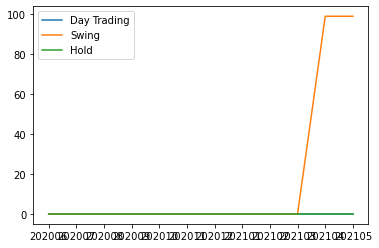

In [ ]:
n = 3

a = day_trading.iloc[n,:]
b = swing.iloc[n,:]
c = hold.iloc[n,:]

a.index = ['202006', '202007', '202008', '202009','202010', '202011', '202012', '202101','202102', '202103', '202104', '202105']
b.index = ['202006', '202007', '202008', '202009','202010', '202011', '202012', '202101','202102', '202103', '202104', '202105']
c.index = ['202006', '202007', '202008', '202009','202010', '202011', '202012', '202101','202102', '202103', '202104', '202105']

plt.plot(a)
plt.plot(b)
plt.plot(c)

plt.legend(['Day Trading', 'Swing', 'Hold'])
plt.show()

### 2-1-2. 데이터 내보내기

In [ ]:
order_pattern = pd.concat([day_trading, swing, hold], axis=1)

In [ ]:
order_pattern.to_csv('order_pattern.csv', sep=',', encoding='utf-8')

# 국내-해외 주식자산 비중

In [ ]:
in_stock_value1 = df[[f'국내주식자산_20200{i}' for i in range(6,10)]]
in_stock_value2 = df[[f'국내주식자산_2020{i}' for i in range(10,13)]]
in_stock_value3 = df[[f'국내주식자산_20210{i}' for i in range(1,6)]]

in_stock_value = pd.concat([in_stock_value1, in_stock_value2, in_stock_value3], axis=1)
for i in in_stock_value:
    in_stock_value.loc[:,i] = pd.to_numeric(in_stock_value.loc[:,i])
    
in_stock_value.head()

,국내주식자산_202006,국내주식자산_202007,국내주식자산_202008,국내주식자산_202009,국내주식자산_202010,국내주식자산_202011,국내주식자산_202012,국내주식자산_202101,국내주식자산_202102,국내주식자산_202103,국내주식자산_202104,국내주식자산_202105
1390825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,230000.0,4900000.0,440000.0
695531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64750,1300000.0,0.0,1000000.0,1000000.0,990000.0,0.0,0.0,1400000.0,1400000.0,13000000.0,110000000.0,14000000.0
1288685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
ab_stock_value1 = df[[f'해외주식자산_20200{i}' for i in range(6,10)]]
ab_stock_value2 = df[[f'해외주식자산_2020{i}' for i in range(10,13)]]
ab_stock_value3 = df[[f'해외주식자산_20210{i}' for i in range(1,6)]]

ab_stock_value = pd.concat([ab_stock_value1, ab_stock_value2, ab_stock_value3], axis=1)
for i in ab_stock_value:
    ab_stock_value.loc[:,i] = pd.to_numeric(ab_stock_value.loc[:,i])
    
ab_stock_value.head()

,해외주식자산_202006,해외주식자산_202007,해외주식자산_202008,해외주식자산_202009,해외주식자산_202010,해외주식자산_202011,해외주식자산_202012,해외주식자산_202101,해외주식자산_202102,해외주식자산_202103,해외주식자산_202104,해외주식자산_202105
1390825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
695531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1288685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
date_range = ['006', '007', '008', '009', '010', '011', '012', '101', '102', '103', '104', '105']
in_s_rate = pd.DataFrame()
ab_s_rate = pd.DataFrame()

for i in date_range:
    a = in_stock_value[f'국내주식자산_202{i}']
    b = ab_stock_value[f'해외주식자산_202{i}']
    stock_value = pd.concat([a,b], axis = 1)
    total_stock_value = stock_value.sum(axis = 1)
    stock_value[f'총주식자산_202{i}'] = total_stock_value
    in_rate = (stock_value[f'국내주식자산_202{i}'] / stock_value[f'총주식자산_202{i}']) * 100
    ab_rate = (stock_value[f'해외주식자산_202{i}'] / stock_value[f'총주식자산_202{i}']) * 100
    in_s_rate = pd.concat([in_s_rate, in_rate], axis = 1)
    ab_s_rate = pd.concat([ab_s_rate, ab_rate], axis = 1)
    
in_s_rate.columns = ['in_s_rate_202006', 'in_s_rate_202007', 'in_s_rate_202008', 'in_s_rate_202009','in_s_rate_202010', 'in_s_rate_202011', 'in_s_rate_202012', 'in_s_rate_202101','in_s_rate_202102', 'in_s_rate_202103', 'in_s_rate_202104', 'in_s_rate_202105']
in_s_rate = in_s_rate.fillna(0)
ab_s_rate.columns = ['ab_s_rate_202006', 'ab_s_rate_202007', 'ab_s_rate_202008', 'ab_s_rate_202009','ab_s_rate_202010', 'ab_s_rate_202011', 'ab_s_rate_202012', 'ab_s_rate_202101','ab_s_rate_202102', 'ab_s_rate_202103', 'ab_s_rate_202104', 'ab_s_rate_202105']
ab_s_rate = ab_s_rate.fillna(0)

In [ ]:
in_s_rate.head()

,in_s_rate_202006,in_s_rate_202007,in_s_rate_202008,in_s_rate_202009,in_s_rate_202010,in_s_rate_202011,in_s_rate_202012,in_s_rate_202101,in_s_rate_202102,in_s_rate_202103,in_s_rate_202104,in_s_rate_202105
1390825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0
695531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64750,100.0,0.0,100.0,100.0,100.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0
1288685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
ab_s_rate.head()

,ab_s_rate_202006,ab_s_rate_202007,ab_s_rate_202008,ab_s_rate_202009,ab_s_rate_202010,ab_s_rate_202011,ab_s_rate_202012,ab_s_rate_202101,ab_s_rate_202102,ab_s_rate_202103,ab_s_rate_202104,ab_s_rate_202105
1390825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
695531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1288685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
in_ab_srate = pd.concat([in_s_rate, ab_s_rate], axis=1)

In [ ]:
in_ab_srate.to_csv('in_ab_srate.csv', sep=',', encoding='utf-8')

# 국내-해외주식 집중도

In [ ]:
in_stock_buy1 = df[[f'국내주식매수_20200{i}' for i in range(6,10)]]
in_stock_buy2 = df[[f'국내주식매수_2020{i}' for i in range(10,13)]]
in_stock_buy3 = df[[f'국내주식매수_20210{i}' for i in range(1,6)]]

in_stock_buy = pd.concat([in_stock_buy1, in_stock_buy2, in_stock_buy3], axis=1)
for i in in_stock_buy:
    in_stock_buy.loc[:,i] = pd.to_numeric(in_stock_buy.loc[:,i])
    
in_stock_buy.head()

,국내주식매수_202006,국내주식매수_202007,국내주식매수_202008,국내주식매수_202009,국내주식매수_202010,국내주식매수_202011,국내주식매수_202012,국내주식매수_202101,국내주식매수_202102,국내주식매수_202103,국내주식매수_202104,국내주식매수_202105
1390825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
695531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20000.0,0.0,9900000.0,560000.0,2300000.0
1288685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
in_stock_sell1 = df[[f'국내주식매도_20200{i}' for i in range(6,10)]]
in_stock_sell2 = df[[f'국내주식매도_2020{i}' for i in range(10,13)]]
in_stock_sell3 = df[[f'국내주식매도_20210{i}' for i in range(1,6)]]

in_stock_sell = pd.concat([in_stock_sell1, in_stock_sell2, in_stock_sell3], axis=1)
for i in in_stock_sell:
    in_stock_sell.loc[:,i] = pd.to_numeric(in_stock_sell.loc[:,i])
    
in_stock_sell.head()

,국내주식매도_202006,국내주식매도_202007,국내주식매도_202008,국내주식매도_202009,국내주식매도_202010,국내주식매도_202011,국내주식매도_202012,국내주식매도_202101,국내주식매도_202102,국내주식매도_202103,국내주식매도_202104,국내주식매도_202105
1390825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
695531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1200000.0,0.0,9900000.0
1288685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
ab_stock_buy1 = df[[f'해외주식매수_20200{i}' for i in range(6,10)]]
ab_stock_buy2 = df[[f'해외주식매수_2020{i}' for i in range(10,13)]]
ab_stock_buy3 = df[[f'해외주식매수_20210{i}' for i in range(1,6)]]

ab_stock_buy = pd.concat([ab_stock_buy1, ab_stock_buy2, ab_stock_buy3], axis=1)
for i in ab_stock_buy:
    ab_stock_buy.loc[:,i] = pd.to_numeric(ab_stock_buy.loc[:,i])
    
ab_stock_buy.head()

,해외주식매수_202006,해외주식매수_202007,해외주식매수_202008,해외주식매수_202009,해외주식매수_202010,해외주식매수_202011,해외주식매수_202012,해외주식매수_202101,해외주식매수_202102,해외주식매수_202103,해외주식매수_202104,해외주식매수_202105
1390825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
695531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1288685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
ab_stock_sell1 = df[[f'해외주식매도_20200{i}' for i in range(6,10)]]
ab_stock_sell2 = df[[f'해외주식매도_2020{i}' for i in range(10,13)]]
ab_stock_sell3 = df[[f'해외주식매도_20210{i}' for i in range(1,6)]]

ab_stock_sell = pd.concat([ab_stock_sell1, ab_stock_sell2, ab_stock_sell3], axis=1)
for i in ab_stock_sell:
    ab_stock_sell.loc[:,i] = pd.to_numeric(ab_stock_sell.loc[:,i])
    
ab_stock_sell.head()

,해외주식매도_202006,해외주식매도_202007,해외주식매도_202008,해외주식매도_202009,해외주식매도_202010,해외주식매도_202011,해외주식매도_202012,해외주식매도_202101,해외주식매도_202102,해외주식매도_202103,해외주식매도_202104,해외주식매도_202105
1390825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
695531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1288685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


국내집중도 = (국내주식매수+국내주식매도)/국내주식자산

해외집중도 = (해외주식매수+해외주식매도)/해외자산

In [ ]:
date_range = ['006', '007', '008', '009', '010', '011', '012', '101', '102', '103', '104', '105']
in_stock_con = pd.DataFrame()

for i in date_range:
    a = in_stock_buy[f'국내주식매수_202{i}']
    b = in_stock_sell[f'국내주식매도_202{i}']
    in_stock_order = pd.concat([a,b], axis = 1)
    in_stock_order_sum = in_stock_order.sum(axis = 1)
    in_stock_order[f'국내주식주문합_202{i}'] = in_stock_order_sum
    in_stock_order_con = in_stock_order_sum / in_stock_value[f'국내주식자산_202{i}']
    in_stock_con = pd.concat([in_stock_con, in_stock_order_con], axis = 1)
    
in_stock_con.columns = ['in_stock_con_202006', 'in_stock_con_202007', 'in_stock_con_202008', 'in_stock_con_202009','in_stock_con_202010', 'in_stock_con_202011', 'in_stock_con_202012', 'in_stock_con_202101','in_stock_con_202102', 'in_stock_con_202103', 'in_stock_con_202104', 'in_stock_con_202105']
in_stock_con = in_stock_con.fillna(0)

in_stock_con.head()

,in_stock_con_202006,in_stock_con_202007,in_stock_con_202008,in_stock_con_202009,in_stock_con_202010,in_stock_con_202011,in_stock_con_202012,in_stock_con_202101,in_stock_con_202102,in_stock_con_202103,in_stock_con_202104,in_stock_con_202105
1390825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
250034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
695531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
64750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014286,0.0,0.853846,0.005091,0.871429
1288685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000


In [ ]:
date_range = ['006', '007', '008', '009', '010', '011', '012', '101', '102', '103', '104', '105']
ab_stock_con = pd.DataFrame()

for i in date_range:
    a = ab_stock_buy[f'해외주식매수_202{i}']
    b = ab_stock_sell[f'해외주식매도_202{i}']
    ab_stock_order = pd.concat([a,b], axis = 1)
    ab_stock_order_sum = ab_stock_order.sum(axis = 1)
    ab_stock_order[f'해외주식주문합_202{i}'] = ab_stock_order_sum
    ab_stock_order_con = ab_stock_order_sum / ab_stock_value[f'해외주식자산_202{i}']
    ab_stock_con = pd.concat([ab_stock_con, ab_stock_order_con], axis = 1)
    
ab_stock_con.columns = ['ab_stock_con_202006', 'ab_stock_con_202007', 'ab_stock_con_202008', 'ab_stock_con_202009','ab_stock_con_202010', 'ab_stock_con_202011', 'ab_stock_con_202012', 'ab_stock_con_202101','ab_stock_con_202102', 'ab_stock_con_202103', 'ab_stock_con_202104', 'ab_stock_con_202105']
ab_stock_con = ab_stock_con.fillna(0)

ab_stock_con.head()

,ab_stock_con_202006,ab_stock_con_202007,ab_stock_con_202008,ab_stock_con_202009,ab_stock_con_202010,ab_stock_con_202011,ab_stock_con_202012,ab_stock_con_202101,ab_stock_con_202102,ab_stock_con_202103,ab_stock_con_202104,ab_stock_con_202105
1390825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
695531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1288685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
date_range = ['006', '007', '008', '009', '010', '011', '012', '101', '102', '103', '104', '105']
in_s_con_rate = pd.DataFrame()
ab_s_con_rate = pd.DataFrame()

for i in date_range:
    a = in_stock_con[f'in_stock_con_202{i}']
    b = ab_stock_con[f'ab_stock_con_202{i}']
    stock_con = pd.concat([a,b], axis = 1)
    total_stock_con = stock_con.sum(axis = 1)
    stock_con[f'total_stock_con_202{i}'] = total_stock_con
    in_rate = (in_stock_con[f'in_stock_con_202{i}'] / stock_con[f'total_stock_con_202{i}']) * 100
    ab_rate = (ab_stock_con[f'ab_stock_con_202{i}'] / stock_con[f'total_stock_con_202{i}']) * 100
    in_s_con_rate = pd.concat([in_s_con_rate, in_rate], axis = 1)
    ab_s_con_rate = pd.concat([ab_s_con_rate, ab_rate], axis = 1)
    
column_name = 'in_s_con_rate'

in_s_con_rate.columns = [f'{column_name}_202006', f'{column_name}_202007', f'{column_name}_202008', f'{column_name}_202009',f'{column_name}_202010', f'{column_name}_202011', f'{column_name}_202012', f'{column_name}_202101', f'{column_name}_202102', f'{column_name}_202103', f'{column_name}_202104', f'{column_name}_202105']
in_s_con_rate = in_s_con_rate.fillna(0)

column_name = 'ab_s_con_rate'

ab_s_con_rate.columns = [f'{column_name}_202006', f'{column_name}_202007', f'{column_name}_202008', f'{column_name}_202009',f'{column_name}_202010', f'{column_name}_202011', f'{column_name}_202012', f'{column_name}_202101', f'{column_name}_202102', f'{column_name}_202103', f'{column_name}_202104', f'{column_name}_202105']
ab_s_con_rate = ab_s_con_rate.fillna(0)

In [ ]:
in_s_con_rate.head()

,in_s_con_rate_202006,in_s_con_rate_202007,in_s_con_rate_202008,in_s_con_rate_202009,in_s_con_rate_202010,in_s_con_rate_202011,in_s_con_rate_202012,in_s_con_rate_202101,in_s_con_rate_202102,in_s_con_rate_202103,in_s_con_rate_202104,in_s_con_rate_202105
1390825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
695531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,100.0,100.0
1288685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
ab_s_con_rate.head()

,ab_s_con_rate_202006,ab_s_con_rate_202007,ab_s_con_rate_202008,ab_s_con_rate_202009,ab_s_con_rate_202010,ab_s_con_rate_202011,ab_s_con_rate_202012,ab_s_con_rate_202101,ab_s_con_rate_202102,ab_s_con_rate_202103,ab_s_con_rate_202104,ab_s_con_rate_202105
1390825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
695531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1288685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
in_ab_conrate = pd.concat([in_s_con_rate, ab_s_con_rate], axis=1)

In [ ]:
in_ab_conrate.to_csv('in_ab_conrate.csv', sep=',', encoding='utf-8')

# 활발도

In [ ]:
stock_order_n1 = df[[f'거래종목수_20200{i}' for i in range(6,10)]]
stock_order_n2 = df[[f'거래종목수_2020{i}' for i in range(10,13)]]
stock_order_n3 = df[[f'거래종목수_20210{i}' for i in range(1,6)]]

stock_order_n = pd.concat([stock_order_n1, stock_order_n2, stock_order_n3], axis=1)
for i in stock_order_n:
    stock_order_n.loc[:,i] = pd.to_numeric(stock_order_n.loc[:,i])
    
stock_order_n.head()

,거래종목수_202006,거래종목수_202007,거래종목수_202008,거래종목수_202009,거래종목수_202010,거래종목수_202011,거래종목수_202012,거래종목수_202101,거래종목수_202102,거래종목수_202103,거래종목수_202104,거래종목수_202105
1390825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250034,8.0,3.0,11.0,4.0,0.0,0.0,0.0,3.0,5.0,4.0,13.0,7.0
695531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0
1288685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
activity = stock_order_n.copy()

date_range = ['006', '007', '008', '009', '010', '011', '012', '101', '102', '103', '104', '105']
activity.columns = [f'활발도_202{i}' for i in date_range]

In [ ]:
activity.to_csv('activity.csv', sep=',', encoding='utf-8')

# 포트폴리오 다양성
거래종목수 + 보유종목수

In [ ]:
column_name = '보유종목수'

stock_hold_n1 = df[[f'{column_name}_20200{i}' for i in range(6,10)]]
stock_hold_n2 = df[[f'{column_name}_2020{i}' for i in range(10,13)]]
stock_hold_n3 = df[[f'{column_name}_20210{i}' for i in range(1,6)]]

stock_hold_n = pd.concat([stock_hold_n1, stock_hold_n2, stock_hold_n3], axis=1)
for i in stock_hold_n:
    stock_hold_n.loc[:,i] = pd.to_numeric(stock_hold_n.loc[:,i])
    
stock_hold_n.head()

,보유종목수_202006,보유종목수_202007,보유종목수_202008,보유종목수_202009,보유종목수_202010,보유종목수_202011,보유종목수_202012,보유종목수_202101,보유종목수_202102,보유종목수_202103,보유종목수_202104,보유종목수_202105
1390825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250034,3.0,6.0,6.0,4.0,4.0,3.0,3.0,3.0,5.0,5.0,6.0,9.0
695531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1288685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
date_range = ['006', '007', '008', '009', '010', '011', '012', '101', '102', '103', '104', '105']
stock_n = pd.DataFrame()

for i in date_range:
    a = stock_order_n[f'거래종목수_202{i}']
    b = stock_hold_n[f'보유종목수_202{i}']
    stock_total_n = pd.concat([a,b], axis = 1)
    stock_n_sum = stock_total_n.sum(axis = 1)
    stock_total_n[f'총종목수_202{i}'] = stock_n_sum
    stock_n = pd.concat([stock_n, stock_total_n[f'총종목수_202{i}']], axis = 1)
    
stock_n.head()

,총종목수_202006,총종목수_202007,총종목수_202008,총종목수_202009,총종목수_202010,총종목수_202011,총종목수_202012,총종목수_202101,총종목수_202102,총종목수_202103,총종목수_202104,총종목수_202105
1390825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250034,11.0,9.0,17.0,8.0,4.0,3.0,3.0,6.0,10.0,9.0,19.0,16.0
695531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0
1288685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
stock_n.to_csv('stock_n.csv', sep=',', encoding='utf-8')

# 매체 이용 성향

m.stock접속일수/m.global접속일수 등 → 뺀질나게 들어와서 보느냐/적당히 와서 보느냐/묻어놓고 안보느냐 -> 접속카운트/일수(국내/해외), mstock 접속일수와 mglobal 접속일수 비중 비교

### m.stock 접속정도

In [ ]:
stock1 = df[[f'm.Stock_접속일수_20200{i}' for i in range(6,10)]]
stock2 = df[[f'm.Stock_접속일수_2020{i}' for i in range(10,13)]]
stock3 = df[[f'm.Stock_접속일수_20210{i}' for i in range(1,6)]]

mstock = pd.concat([stock1, stock2, stock3], axis=1)
for i in mstock:
    mstock.loc[:,i] = pd.to_numeric(mstock.loc[:,i])
    
mstock.head()

,m.Stock_접속일수_202006,m.Stock_접속일수_202007,m.Stock_접속일수_202008,m.Stock_접속일수_202009,m.Stock_접속일수_202010,m.Stock_접속일수_202011,m.Stock_접속일수_202012,m.Stock_접속일수_202101,m.Stock_접속일수_202102,m.Stock_접속일수_202103,m.Stock_접속일수_202104,m.Stock_접속일수_202105
1390825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
250034,23.0,16.0,23.0,19.0,14.0,17.0,24.0,18.0,17.0,20.0,23.0,21.0
695531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
64750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,27.0
1288685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


### m.global 접속정도

In [ ]:
global1 = df[[f'm.Global_접속일수_20200{i}' for i in range(6,10)]]
global2 = df[[f'm.Global_접속일수_2020{i}' for i in range(10,13)]]
global3 = df[[f'm.Global_접속일수_20210{i}' for i in range(1,6)]]

mglobal = pd.concat([global1, global2, global3], axis=1)

for i in mglobal:
    mglobal.loc[:,i] = pd.to_numeric(mglobal.loc[:,i])
    
mglobal.head()

,m.Global_접속일수_202006,m.Global_접속일수_202007,m.Global_접속일수_202008,m.Global_접속일수_202009,m.Global_접속일수_202010,m.Global_접속일수_202011,m.Global_접속일수_202012,m.Global_접속일수_202101,m.Global_접속일수_202102,m.Global_접속일수_202103,m.Global_접속일수_202104,m.Global_접속일수_202105
1390825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
695531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,17.0
1288685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### m.stock / m.global 접속 비중

In [ ]:
stock_global = pd.DataFrame(index = range(0, len(df)), columns = [])
for i in range(0,12):
    stock_global[i] = mstock.iloc[:, i]/(mstock.iloc[:, i] + mglobal.iloc[:, i])

stock_global.fillna(0, inplace=True)

stock_global.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.00000,1.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.857143,0.74359,0.763158
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000
5,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.00000,1.000000
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000
8,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.00000,1.000000
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.000000,1.00000,1.000000


In [ ]:
colname = 'm.Stock접속비중'
stock_global.columns = [f'{colname}_202006', f'{colname}_202007', f'{colname}_202008', f'{colname}_202009',
                       f'{colname}_202010', f'{colname}_202011', f'{colname}_202012', f'{colname}_202101',
                       f'{colname}_202102', f'{colname}_202103', f'{colname}_202104', f'{colname}_202105']

In [ ]:
stock_global.to_csv('stock_global_rate.csv', sep=',', encoding='utf-8')

# 선호 시장

코스피: 우량주or대기업 / 코스닥: 중소 or 벤처, 스타트업 -> 있는 거 활용

In [ ]:
prefer1 = df[[f'선호시장_20200{i}' for i in range(6,10)]]
prefer2 = df[[f'선호시장_2020{i}' for i in range(10,13)]]
prefer3 = df[[f'선호시장_20210{i}' for i in range(1,6)]]

prefer = pd.concat([prefer1, prefer2, prefer3], axis=1)

prefer.head()

,선호시장_202006,선호시장_202007,선호시장_202008,선호시장_202009,선호시장_202010,선호시장_202011,선호시장_202012,선호시장_202101,선호시장_202102,선호시장_202103,선호시장_202104,선호시장_202105
1390825,0,0,0,0,0,0,0,0,0,0,0,0
250034,0,코스피,코스피,코스피,코스피,코스피,코스피,코스피,코스피,코스피,코스피,코스피
695531,0,0,0,0,0,0,0,0,0,0,0,0
64750,0,0,0,0,0,0,0,0,0,0,코스피,코스피
1288685,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 인코딩

prefer_changedict = {'코스피':1, '코스닥':2, '시장전체':3}
prefer = prefer.replace(prefer_changedict)

for i in prefer:
    prefer.loc[:,i] = pd.to_numeric(prefer.loc[:,i])
    
prefer.head()

,선호시장_202006,선호시장_202007,선호시장_202008,선호시장_202009,선호시장_202010,선호시장_202011,선호시장_202012,선호시장_202101,선호시장_202102,선호시장_202103,선호시장_202104,선호시장_202105
1390825,0,0,0,0,0,0,0,0,0,0,0,0
250034,0,1,1,1,1,1,1,1,1,1,1,1
695531,0,0,0,0,0,0,0,0,0,0,0,0
64750,0,0,0,0,0,0,0,0,0,0,1,1
1288685,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
prefer.to_csv('prefer.csv', sep=',', encoding='utf-8')

In [ ]:
# prefer_rowcount = prefer.apply(lambda s: s.value_counts(), axis=1).fillna(0)

In [ ]:
# prefer_rowcount

# 이익실현횟수/총 횟수(이익실현 + 손절)

In [ ]:
loss1 = df[[f'손절횟수_20200{i}' for i in range(6,10)]]
loss2 = df[[f'손절횟수_2020{i}' for i in range(10,13)]]
loss3 = df[[f'손절횟수_20210{i}' for i in range(1,6)]]

loss = pd.concat([loss1, loss2, loss3], axis=1)
for i in loss:
    loss.loc[:,i] = pd.to_numeric(loss.loc[:,i])
    
loss.head()

,손절횟수_202006,손절횟수_202007,손절횟수_202008,손절횟수_202009,손절횟수_202010,손절횟수_202011,손절횟수_202012,손절횟수_202101,손절횟수_202102,손절횟수_202103,손절횟수_202104,손절횟수_202105
1390825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250034,0.0,1.0,1.0,4.0,5.0,5.0,4.0,4.0,4.0,2.0,1.0,6.0
695531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1288685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
profit1 = df[[f'이익실현횟수_20200{i}' for i in range(6,10)]]
profit2 = df[[f'이익실현횟수_2020{i}' for i in range(10,13)]]
profit3 = df[[f'이익실현횟수_20210{i}' for i in range(1,6)]]

profit = pd.concat([profit1, profit2, profit3], axis=1)
for i in profit:
    profit.loc[:,i] = pd.to_numeric(profit.loc[:,i])

profit.head()

,이익실현횟수_202006,이익실현횟수_202007,이익실현횟수_202008,이익실현횟수_202009,이익실현횟수_202010,이익실현횟수_202011,이익실현횟수_202012,이익실현횟수_202101,이익실현횟수_202102,이익실현횟수_202103,이익실현횟수_202104,이익실현횟수_202105
1390825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250034,0.0,6.0,7.0,13.0,16.0,16.0,15.0,10.0,11.0,10.0,19.0,31.0
695531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0
1288685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
profit_loss = pd.DataFrame(index = range(0, len(df)), columns = [])
for i in range(0,12):
    profit_loss[i] = profit.iloc[:, i]/(profit.iloc[:, i] + loss.iloc[:, i])

profit_loss.fillna(0, inplace=True)

profit_loss.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.500000,0.777778,0.696970,0.590909
4,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.0,0.666667,0.652174,0.0,0.644628,0.631148,0.636364,0.576271,0.590164,0.580357,0.617647,0.640449
6,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.0,0.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.923077,0.909091,0.916667,0.916667
9,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.697674,0.805556,0.818182,0.841667,0.837838


In [ ]:
colname = '이익실현비중'
profit_loss.columns = [f'{colname}_202006', f'{colname}_202007', f'{colname}_202008', f'{colname}_202009',
                       f'{colname}_202010', f'{colname}_202011', f'{colname}_202012', f'{colname}_202101',
                       f'{colname}_202102', f'{colname}_202103', f'{colname}_202104', f'{colname}_202105']

In [ ]:
profit_loss.to_csv('profit_loss.csv', sep=',', encoding='utf-8')

# 신용/대출정보

In [ ]:
credit1 = df[[f'신용_20200{i}' for i in range(6,10)]]
credit2 = df[[f'신용_2020{i}' for i in range(10,13)]]
credit3 = df[[f'신용_20210{i}' for i in range(1,6)]]

credit = pd.concat([credit1, credit2, credit3], axis=1)
for i in credit:
    credit.loc[:,i] = pd.to_numeric(credit.loc[:,i])

credit.head()

,신용_202006,신용_202007,신용_202008,신용_202009,신용_202010,신용_202011,신용_202012,신용_202101,신용_202102,신용_202103,신용_202104,신용_202105
1390825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
695531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1288685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
credit.to_csv('credit.csv', sep=',', encoding='utf-8')

# AI 사용 실태 파악

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
used_col_list = ['Dr.Big의국내주식','Dr.Big의해외주식','Dr.Big의국내ETF','Dr.Big의펀드연금','Dr.Big의투자진단','Dr.Big의시그널','뉴스로종목포착','해외ETF트렌드','초고수의선택','주간상품TOP10']

In [ ]:
df2101 = df[['Dr.Big의국내주식_202101','Dr.Big의해외주식_202101','Dr.Big의국내ETF_202101','Dr.Big의펀드연금_202101','Dr.Big의투자진단_202101','Dr.Big의시그널_202101','뉴스로종목포착_202101','해외ETF트렌드_202101','초고수의선택_202101','주간상품TOP10_202101']]
df2102 = df[['Dr.Big의국내주식_202102','Dr.Big의해외주식_202102','Dr.Big의국내ETF_202102','Dr.Big의펀드연금_202102','Dr.Big의투자진단_202102','Dr.Big의시그널_202102','뉴스로종목포착_202102','해외ETF트렌드_202102','초고수의선택_202102','주간상품TOP10_202102']]
df2103 = df[['Dr.Big의국내주식_202103','Dr.Big의해외주식_202103','Dr.Big의국내ETF_202103','Dr.Big의펀드연금_202103','Dr.Big의투자진단_202103','Dr.Big의시그널_202103','뉴스로종목포착_202103','해외ETF트렌드_202103','초고수의선택_202103','주간상품TOP10_202103']]
df2104 = df[['Dr.Big의국내주식_202104','Dr.Big의해외주식_202104','Dr.Big의국내ETF_202104','Dr.Big의펀드연금_202104','Dr.Big의투자진단_202104','Dr.Big의시그널_202104','뉴스로종목포착_202104','해외ETF트렌드_202104','초고수의선택_202104','주간상품TOP10_202104']]
df2105 = df[['Dr.Big의국내주식_202105','Dr.Big의해외주식_202105','Dr.Big의국내ETF_202105','Dr.Big의펀드연금_202105','Dr.Big의투자진단_202105','Dr.Big의시그널_202105','뉴스로종목포착_202105','해외ETF트렌드_202105','초고수의선택_202105','주간상품TOP10_202105']]

In [ ]:
df2101.columns = [['Dr.Big의국내주식','Dr.Big의해외주식','Dr.Big의국내ETF','Dr.Big의펀드연금','Dr.Big의투자진단','Dr.Big의시그널','뉴스로종목포착','해외ETF트렌드','초고수의선택','주간상품TOP10']]
df2102.columns = [['Dr.Big의국내주식','Dr.Big의해외주식','Dr.Big의국내ETF','Dr.Big의펀드연금','Dr.Big의투자진단','Dr.Big의시그널','뉴스로종목포착','해외ETF트렌드','초고수의선택','주간상품TOP10']]
df2103.columns = [['Dr.Big의국내주식','Dr.Big의해외주식','Dr.Big의국내ETF','Dr.Big의펀드연금','Dr.Big의투자진단','Dr.Big의시그널','뉴스로종목포착','해외ETF트렌드','초고수의선택','주간상품TOP10']]
df2104.columns = [['Dr.Big의국내주식','Dr.Big의해외주식','Dr.Big의국내ETF','Dr.Big의펀드연금','Dr.Big의투자진단','Dr.Big의시그널','뉴스로종목포착','해외ETF트렌드','초고수의선택','주간상품TOP10']]
df2105.columns = [['Dr.Big의국내주식','Dr.Big의해외주식','Dr.Big의국내ETF','Dr.Big의펀드연금','Dr.Big의투자진단','Dr.Big의시그널','뉴스로종목포착','해외ETF트렌드','초고수의선택','주간상품TOP10']]

In [ ]:
df2006 = df[['Dr.Big의국내주식_202006','Dr.Big의해외주식_202006','Dr.Big의국내ETF_202006','Dr.Big의펀드연금_202006','Dr.Big의투자진단_202006','Dr.Big의시그널_202006','뉴스로종목포착_202006','해외ETF트렌드_202006','초고수의선택_202006','주간상품TOP10_202006']]
df2007 = df[['Dr.Big의국내주식_202007','Dr.Big의해외주식_202007','Dr.Big의국내ETF_202007','Dr.Big의펀드연금_202007','Dr.Big의투자진단_202007','Dr.Big의시그널_202007','뉴스로종목포착_202007','해외ETF트렌드_202007','초고수의선택_202007','주간상품TOP10_202007']]
df2008 = df[['Dr.Big의국내주식_202008','Dr.Big의해외주식_202008','Dr.Big의국내ETF_202008','Dr.Big의펀드연금_202008','Dr.Big의투자진단_202008','Dr.Big의시그널_202008','뉴스로종목포착_202008','해외ETF트렌드_202008','초고수의선택_202008','주간상품TOP10_202008']]
df2009 = df[['Dr.Big의국내주식_202009','Dr.Big의해외주식_202009','Dr.Big의국내ETF_202009','Dr.Big의펀드연금_202009','Dr.Big의투자진단_202009','Dr.Big의시그널_202009','뉴스로종목포착_202009','해외ETF트렌드_202009','초고수의선택_202009','주간상품TOP10_202009']]
df2010 = df[['Dr.Big의국내주식_202010','Dr.Big의해외주식_202010','Dr.Big의국내ETF_202010','Dr.Big의펀드연금_202010','Dr.Big의투자진단_202010','Dr.Big의시그널_202010','뉴스로종목포착_202010','해외ETF트렌드_202010','초고수의선택_202010','주간상품TOP10_202010']]
df2011 = df[['Dr.Big의국내주식_202011','Dr.Big의해외주식_202011','Dr.Big의국내ETF_202011','Dr.Big의펀드연금_202011','Dr.Big의투자진단_202011','Dr.Big의시그널_202011','뉴스로종목포착_202011','해외ETF트렌드_202011','초고수의선택_202011','주간상품TOP10_202011']]
df2012 = df[['Dr.Big의국내주식_202012','Dr.Big의해외주식_202012','Dr.Big의국내ETF_202012','Dr.Big의펀드연금_202012','Dr.Big의투자진단_202012','Dr.Big의시그널_202012','뉴스로종목포착_202012','해외ETF트렌드_202012','초고수의선택_202012','주간상품TOP10_202012']]


In [ ]:
df2006.columns = [['Dr.Big의국내주식','Dr.Big의해외주식','Dr.Big의국내ETF','Dr.Big의펀드연금','Dr.Big의투자진단','Dr.Big의시그널','뉴스로종목포착','해외ETF트렌드','초고수의선택','주간상품TOP10']]
df2007.columns = [['Dr.Big의국내주식','Dr.Big의해외주식','Dr.Big의국내ETF','Dr.Big의펀드연금','Dr.Big의투자진단','Dr.Big의시그널','뉴스로종목포착','해외ETF트렌드','초고수의선택','주간상품TOP10']]
df2008.columns = [['Dr.Big의국내주식','Dr.Big의해외주식','Dr.Big의국내ETF','Dr.Big의펀드연금','Dr.Big의투자진단','Dr.Big의시그널','뉴스로종목포착','해외ETF트렌드','초고수의선택','주간상품TOP10']]
df2009.columns = [['Dr.Big의국내주식','Dr.Big의해외주식','Dr.Big의국내ETF','Dr.Big의펀드연금','Dr.Big의투자진단','Dr.Big의시그널','뉴스로종목포착','해외ETF트렌드','초고수의선택','주간상품TOP10']]
df2010.columns = [['Dr.Big의국내주식','Dr.Big의해외주식','Dr.Big의국내ETF','Dr.Big의펀드연금','Dr.Big의투자진단','Dr.Big의시그널','뉴스로종목포착','해외ETF트렌드','초고수의선택','주간상품TOP10']]
df2011.columns = [['Dr.Big의국내주식','Dr.Big의해외주식','Dr.Big의국내ETF','Dr.Big의펀드연금','Dr.Big의투자진단','Dr.Big의시그널','뉴스로종목포착','해외ETF트렌드','초고수의선택','주간상품TOP10']]
df2012.columns = [['Dr.Big의국내주식','Dr.Big의해외주식','Dr.Big의국내ETF','Dr.Big의펀드연금','Dr.Big의투자진단','Dr.Big의시그널','뉴스로종목포착','해외ETF트렌드','초고수의선택','주간상품TOP10']]

In [ ]:
ai_use = df2006 + df2007 + df2008 + df2009 + df2010 + df2011 + df2012 + df2101 + df2102 + df2103 + df2104 + df2105
ai_use

,Dr.Big의국내주식,Dr.Big의해외주식,Dr.Big의국내ETF,Dr.Big의펀드연금,Dr.Big의투자진단,Dr.Big의시그널,뉴스로종목포착,해외ETF트렌드,초고수의선택,주간상품TOP10
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,428.0,0.0,0.0,0.0,1103.0,180.0,146.0,12.0,72.0,178.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1499987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1499988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1499989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1499990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
ai_use['sum'] = ai_use.sum(axis=1)
ai_use['sum']

,sum
0,1.0
1,0.0
2,0.0
3,2119.0
4,1.0
...,...
1499987,0.0
1499988,0.0
1499989,0.0
1499990,0.0


In [ ]:
ai_use.columns = ['Dr.Big의국내주식','Dr.Big의해외주식','Dr.Big의국내ETF','Dr.Big의펀드연금','Dr.Big의투자진단','Dr.Big의시그널','뉴스로종목포착','해외ETF트렌드','초고수의선택','주간상품TOP10', 'sum']

In [ ]:
ai_use.loc[ai_use['sum'] == 0, 'yearlyuse'] = '사용안함'
ai_use.loc[(ai_use['sum'] > 0)&(ai_use['sum'] < 12), 'yearlyuse'] = '연 1회 미만'
ai_use.loc[(ai_use['sum'] >= 12)&(ai_use['sum'] < 24), 'yearlyuse'] = '연 1회 이상 2회 미만'
ai_use.loc[(ai_use['sum'] >= 24)&(ai_use['sum'] < 36), 'yearlyuse'] = '연 2회 이상 3회 미만'
ai_use.loc[(ai_use['sum'] >= 36)&(ai_use['sum'] < 48), 'yearlyuse'] = '연 3회 이상 4회 미만'
ai_use.loc[ai_use['sum'] >= 48, 'yearlyuse'] = '연 4회 이상'

In [ ]:
ai_use

,Dr.Big의국내주식,Dr.Big의해외주식,Dr.Big의국내ETF,Dr.Big의펀드연금,Dr.Big의투자진단,Dr.Big의시그널,뉴스로종목포착,해외ETF트렌드,초고수의선택,주간상품TOP10,sum,yearlyuse
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,연 1회 미만
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,사용안함
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,사용안함
3,428.0,0.0,0.0,0.0,1103.0,180.0,146.0,12.0,72.0,178.0,2119.0,연 4회 이상
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,연 1회 미만
...,...,...,...,...,...,...,...,...,...,...,...,...
1499987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,사용안함
1499988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,사용안함
1499989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,사용안함
1499990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,사용안함


In [ ]:
from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/gulim.ttc'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

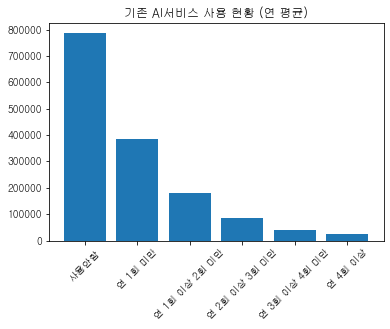

In [ ]:
plt.bar(['사용안함','연 1회 미만','연 1회 이상 2회 미만','연 2회 이상 3회 미만','연 3회 이상 4회 미만', '연 4회 이상'], ai_use['yearlyuse'].value_counts())
plt.title('기존 AI서비스 사용 현황 (연 평균)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
ai_use['yearlyuse'].value_counts()

사용안함             785503
연 1회 미만          383575
연 4회 이상          179507
연 1회 이상 2회 미만     83757
연 2회 이상 3회 미만     41337
연 3회 이상 4회 미만     26313
Name: yearlyuse, dtype: int64

In [ ]:
ai_use['sum'].describe()

count    1.499992e+06
mean     5.178256e+01
std      2.704370e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      8.000000e+00
max      1.312600e+04
Name: sum, dtype: float64

# 종목정보

## 관심분야(성장/가치주)

관심분야(성장주/가치주 등) -> top unique() 뽑아서 대응하는 종목의 PBR,PER 등등 계산 -> 업계평균 비교 -> 가치/성장 CLASS 부여cnm

## 배당주

배당주(배당수익률)

## 관심분야(업계)

관심분야(업계) -> 업계 카운트내서 비율내면 될듯 -> 일단 종목 뽑아서 업종분류로 라벨링 그룹화.

## 나름의 거래패턴

나름의 거래패턴(경제흐름, 이슈 따라가는지 / 묻어놓고 가아끔 갈아타는지 / 관심분야 내에서: 업계별 코드 부여 -> 코드 변동성